    Age  Sex  Chest Pain  Rest BP  Cholesterol  Blood Sugar  Rest ECG  \
0  60.0  1.0         4.0    130.0        206.0          0.0       2.0   
4  45.0  1.0         4.0    130.0        206.0          0.0       2.0   
5  71.0  1.0         4.0    144.0        254.0          0.0       2.0   
6  62.0  1.0         2.0    130.0        266.0          0.0       0.0   
7  48.0  1.0         2.0    110.0        229.0          0.0       0.0   
8  62.0  0.0         4.0    140.0        268.0          0.0       2.0   

   Max Heart Rate  Exercise Angina  Old Peak  Slope  Discolored Vessels  \
0           132.0              1.0       2.4    2.0                 2.0   
4           132.0              1.0       2.4    2.0                 2.0   
5           147.0              0.0       1.4    2.0                 1.0   
6           171.0              0.0       0.6    1.0                 0.0   
7           168.0              0.0       1.0    3.0                 0.0   
8           160.0              0.0    

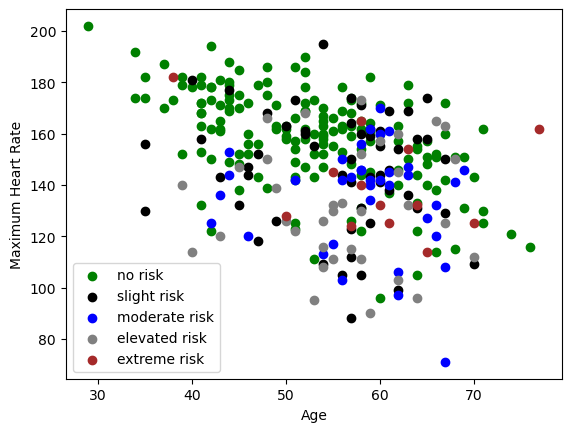

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77        32
         1.0       0.50      0.29      0.36        14
         2.0       0.18      0.33      0.24         6
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         4

    accuracy                           0.51        61
   macro avg       0.29      0.28      0.27        61
weighted avg       0.53      0.51      0.51        61

[[25  2  3  1  1]
 [ 6  4  1  2  1]
 [ 1  1  2  2  0]
 [ 1  0  4  0  0]
 [ 0  1  1  2  0]]
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78        32
         1.0       0.36      0.29      0.32        14
         2.0       0.14      0.17      0.15         6
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         4

    accuracy                           0.52        61
   macro avg       0.25      0.26      0

/Users/geraldclark/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/geraldclark/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/geraldclark/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ger

In [1]:
#python3 -m venv .venv
#install scikit-learn
#pip3 install openpyxl
#"Gerald Clark CMSI 630 exercise1"

import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

def my_nearest_neighbor():
    heart_data = 'my_data1/heart-attack-tests.csv'

    #df_h = pd.read_csv(heart_data, delimiter=';', low_memory=False, na_values='?').drop(['unnamed 0'],axis=1)  
    df_h = pd.read_csv(heart_data, usecols=["Age","Sex", "Chest Pain","Rest BP","Cholesterol","Blood Sugar","Rest ECG","Max Heart Rate",
                                            "Exercise Angina","Old Peak","Slope","Discolored Vessels","Thalessemia"], encoding='utf-8', na_values=['?',''], index_col=False)
    df_h1 = df_h.fillna(-1)
    df_h2 = df_h1[df_h1["Discolored Vessels"]>=0]
    print(df_h2)
    
    df_h1.to_excel("heart_data4.xlsx")
    #heart data used for testing, very few values
    #X_test = df_h2.iloc[:,:-1].values
    #y_test = df_h2.iloc[:,13].values

    #Cleveland Data
    cleveland_data = 'my_data1/cleveland.csv'
    df_c = pd.read_csv(cleveland_data, usecols=["Age","Sex", "Chest Pain","Rest BP","Cholesterol","Blood Sugar","Rest ECG","Max Heart Rate",
                                            "Exercise Angina","Old Peak","Slope","Discolored Vessels","Thalessemia", "Disease Value"], na_values=['?',''], index_col=False)
    df_c1  = df_c.fillna(-1)
    df_c2 = df_c1.drop_duplicates(keep="first")
    #df_c2["Age"] = df_c2["Age"].astype(float)
    df_c3 = df_c2.sort_values(by=['Disease Value'], ascending=False)
    df_c3a = df_c3[df_c3["Disease Value"]<=4]
    df_c4a = df_c3a[df_c3a["Age"] !=0]
    df_c4 = df_c4a[df_c4a["Thalessemia"]>=0]
    df_c5a = df_c4[df_c4["Blood Sugar"]<=1]
    df_c5b = df_c5a[df_c5a["Max Heart Rate"]>=0]
    df_c5 = df_c5b[df_c5b["Sex"]>=0]
    df_c5.to_excel("cleveland_data4.xlsx")

    ff = df_c5.shape
    print(ff)
    #print(df_c5.shape)

    print(df_c5["Disease Value"].value_counts())
    #sns.set_palette("pastel")
    #sns.color_palette("rocket")
    #sns.countplot(x="Disease Value", data=df_c5, hue="Disease Value", palette="PuBu_d")
    #plt.show()

    plt.scatter(x=df_c5["Age"][df_c5["Disease Value"]==0], y=df_c5["Max Heart Rate"][(df_c5["Disease Value"]==0)], c="green")
    plt.scatter(x=df_c5["Age"][df_c5["Disease Value"]==1], y=df_c5["Max Heart Rate"][(df_c5["Disease Value"]==1)], c="black")
    plt.scatter(x=df_c5["Age"][df_c5["Disease Value"]==2], y=df_c5["Max Heart Rate"][(df_c5["Disease Value"]==2)], c="blue")
    plt.scatter(x=df_c5["Age"][df_c5["Disease Value"]==3], y=df_c5["Max Heart Rate"][(df_c5["Disease Value"]==3)], c="grey")
    plt.scatter(x=df_c5["Age"][df_c5["Disease Value"]==4], y=df_c5["Max Heart Rate"][(df_c5["Disease Value"]==4)], c="brown")
    plt.legend(["no risk","slight risk", "moderate risk", "elevated risk", "extreme risk"])
    plt.xlabel("Age")
    plt.ylabel("Maximum Heart Rate")
    plt.show()

    #clevelend data used for training, ~300 values
    X = df_c5.iloc[:,:-1].values
    y = df_c5.iloc[:,13].values

    #split data into a training and test set. Using test set against training set to find acccuracy of model using algorithm k nearest neighbor.
    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state=0)

    #scale data down on x axis
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)

    classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2, weights='uniform') # euclidean, minkowski, manhattan
    classifier = classifier.fit(X_train,y_train)

    #make predictions then checks for accuracy
    y_prediction = classifier.predict(X_test)
    print(classification_report(y_test, y_prediction))
    print(confusion_matrix(y_test, y_prediction))

    cl_2 = KNeighborsClassifier(n_neighbors = 3, metric ='minkowski', p = 2, weights='uniform')
    cl_2 = cl_2.fit(X_train,y_train)
    #prediction function from sklearn
    y_pred_2 = cl_2.predict(X_test)
    #check accuracy
    print(classification_report(y_test, y_pred_2))
    print(confusion_matrix(y_test, y_pred_2))

    cl_3 = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p = 2, weights='uniform')
    cl_3 = cl_3.fit(X_train,y_train)
    y_pred_3 = cl_3.predict(X_test)
    print(classification_report(y_test, y_pred_3))
    print(confusion_matrix(y_test, y_pred_3))

    cl_4 = KNeighborsClassifier(n_neighbors = 9, metric ='minkowski', p = 2, weights='uniform')
    cl_4 = cl_4.fit(X_train,y_train)
    y_pred_4 = cl_4.predict(X_test)
    print(classification_report(y_test, y_pred_4))
    print(confusion_matrix(y_test, y_pred_4))

    cl_5 = KNeighborsClassifier(n_neighbors = 15, metric ='minkowski', p = 2, weights='uniform')
    cl_5 = cl_5.fit(X_train,y_train)
    y_pred_5 = cl_5.predict(X_test)
    print(classification_report(y_test, y_pred_5))
    print(confusion_matrix(y_test, y_pred_5))

    classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean', p = 2, weights='uniform') # euclidean, minkowski, manhattan
    classifier = classifier.fit(X_train,y_train)

    #make predictions then checks for accuracy
    y_prediction = classifier.predict(X_test)
    print(classification_report(y_test, y_prediction))
    print(confusion_matrix(y_test, y_prediction))

    cl_2a = KNeighborsClassifier(n_neighbors = 3, metric ='euclidean', p = 2, weights='uniform')
    cl_2a = cl_2a.fit(X_train,y_train)
    #prediction function from sklearn
    y_pred_2a = cl_2a.predict(X_test)
    #check accuracy
    print(classification_report(y_test, y_pred_2a))
    print(confusion_matrix(y_test, y_pred_2a))

    cl_3a = KNeighborsClassifier(n_neighbors = 5, metric ='euclidean', p = 2, weights='uniform')
    cl_3a = cl_3a.fit(X_train,y_train)
    y_pred_3a = cl_3a.predict(X_test)
    print(classification_report(y_test, y_pred_3a))
    print(confusion_matrix(y_test, y_pred_3a))

    cl_4a = KNeighborsClassifier(n_neighbors = 9, metric ='euclidean', p = 2, weights='uniform')
    cl_4a = cl_4a.fit(X_train,y_train)
    y_pred_4a = cl_4a.predict(X_test)
    print(classification_report(y_test, y_pred_4a))
    print(confusion_matrix(y_test, y_pred_4a))

    cl_5a = KNeighborsClassifier(n_neighbors = 15, metric ='euclidean', p = 2, weights='uniform')
    cl_5a = cl_5a.fit(X_train,y_train)
    y_pred_5a = cl_5a.predict(X_test)
    print(classification_report(y_test, y_pred_5a))
    print(confusion_matrix(y_test, y_pred_5a))

    classifier2 = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan', p = 2, weights='uniform') # euclidean, minkowski, manhattan
    classifier2 = classifier2.fit(X_train,y_train)

    #make predictions then checks for accuracy
    y_prediction2 = classifier2.predict(X_test)
    print(classification_report(y_test, y_prediction2))
    print(confusion_matrix(y_test, y_prediction2))

    cl_2b = KNeighborsClassifier(n_neighbors = 3, metric ='manhattan', p = 2, weights='uniform')
    cl_2b = cl_2.fit(X_train,y_train)
    #prediction function from sklearn
    y_pred_2b = cl_2b.predict(X_test)
    #check accuracy
    print(classification_report(y_test, y_pred_2b))
    print(confusion_matrix(y_test, y_pred_2b))

    cl_3c = KNeighborsClassifier(n_neighbors = 5, metric ='manhattan', p = 2, weights='uniform')
    cl_3c = cl_3c.fit(X_train,y_train)
    y_pred_3c = cl_3c.predict(X_test)
    print(classification_report(y_test, y_pred_3c))
    print(confusion_matrix(y_test, y_pred_3c))

    cl_4c = KNeighborsClassifier(n_neighbors = 9, metric ='manhattan', p = 2, weights='uniform')
    cl_4c = cl_4c.fit(X_train,y_train)
    y_pred_4c = cl_4c.predict(X_test)
    print(classification_report(y_test, y_pred_4c))
    print(confusion_matrix(y_test, y_pred_4c))

    cl_5c = KNeighborsClassifier(n_neighbors = 15, metric ='manhattan', p = 2, weights='uniform')
    cl_5c = cl_5c.fit(X_train,y_train)
    y_pred_5c = cl_5c.predict(X_test)
    print(classification_report(y_test, y_pred_5c))
    print(confusion_matrix(y_test, y_pred_5c))

    #Manhattan distance with 9 and 15 nearest neighbors is optimal. 
    # Manhatten distance is a distance measure that is calculated by taking the sum of distances between the x and y coordinates


    print("___completed___")

my_nearest_neighbor()











#  https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7
# https://www.kdnuggets.com/2019/07/classifying-heart-disease-using-k-nearest-neighbors.html/2








